#### Description

This code finds optimal islands for the GA_2_2 GeneticAlgorithm run method.

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import time

from GA_2_2 import GeneticAlgorithm

In [17]:
cnn_model_path = '../Models/CNN_6_1_2.keras'
masked_sequence = 'NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN'
max_length = 150

run_per_expression = 10
results = []
target_expression = 1
range_num_islands = range(1, 11)
range_gene_flow = np.arange(0, 1.25, 0.25)

In [ ]:
for num_islands in range_num_islands:
    for gene_flow_rate in range_gene_flow:
        for run_id in range(run_per_expression):
            print(f'num_islands: {num_islands} | gene_flow_rate: {gene_flow_rate} | Run {run_id + 1} ', end='\r')
            
            ga = GeneticAlgorithm(
                cnn_model_path=cnn_model_path,
                masked_sequence=masked_sequence,
                target_expression=target_expression,
                max_length=max_length,
                pop_size=20,
                generations=100,
                base_mutation_rate=0.1,
                precision=0.01,
                chromosomes=1,
                islands=num_islands,
                num_parents=2,
                gene_flow_rate=0.1,
                print_progress=False
            )
            
            # Time the run
            start_time = time.time()
            best_sequence, best_prediction = ga.run()
            end_time = time.time()
            run_time = end_time - start_time
            
            # Record the results
            results.append({
                'num_islands': num_islands,
                'gene_flow_rate': gene_flow_rate,
                'run_id': run_id + 1,
                'best_sequence': best_sequence,
                'error': abs(best_prediction - target_expression),
                'run_time': run_time
            })
    print()

# Convert results to a DataFrame for analysis
results_df = pd.DataFrame(results)

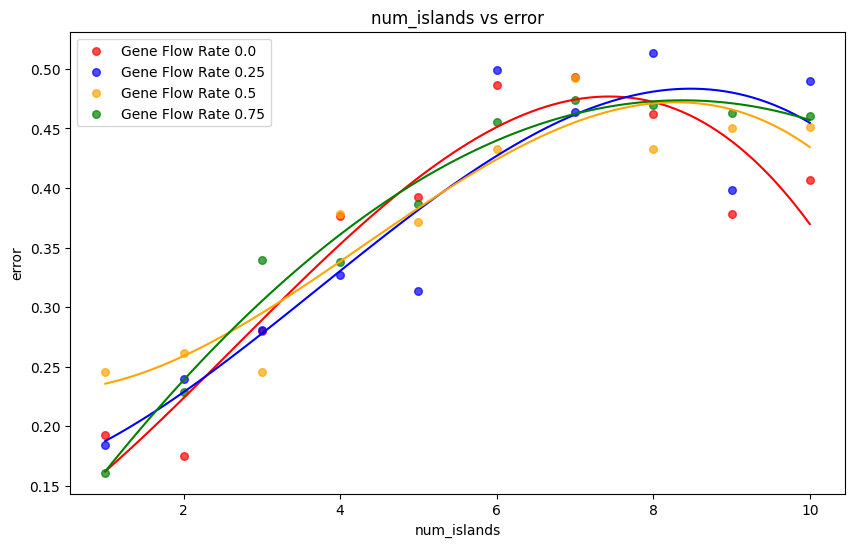

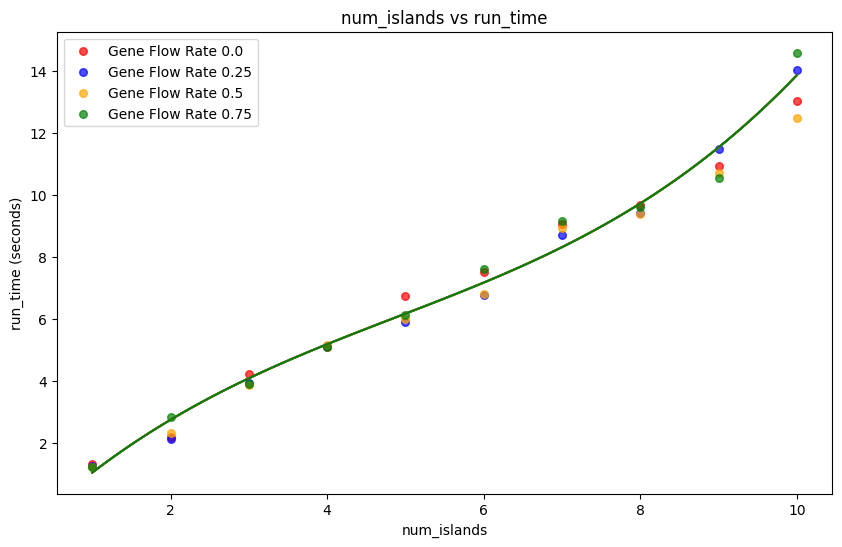

In [ ]:
# Scatter plot for num_islands vs error
plt.figure(figsize=(10, 6))
for gene_flow_rate, color in zip(range_gene_flow, ['red', 'blue', 'orange', 'green']):
    subset = results_df[results_df['gene_flow_rate'] == gene_flow_rate]
    plt.scatter(subset['num_islands'], subset['error'], label=f'Gene Flow Rate {gene_flow_rate}', color=color, s=30, alpha=0.7)
    
    poly_fit = np.polyfit(subset['num_islands'], subset['error'], 3)
    poly_fn = np.poly1d(poly_fit)
    x_vals = np.linspace(subset['num_islands'].min(), subset['num_islands'].max(), 100)
    plt.plot(x_vals, poly_fn(x_vals), color=color)

plt.title('num_islands vs error')
plt.xlabel('num_islands')
plt.ylabel('error')
plt.legend()
plt.show()

# Scatter plot for num_islands vs run_time
plt.figure(figsize=(10, 6))
for gene_flow_rate, color in zip(range_gene_flow, ['red', 'blue', 'orange', 'green']):
    subset = results_df[results_df['gene_flow_rate'] == gene_flow_rate]
    plt.scatter(subset['num_islands'], subset['run_time'], label=f'Gene Flow Rate {gene_flow_rate}', color=color, s=30, alpha=0.7)
    
    poly_fit = np.polyfit(results_df['num_islands'], results_df['run_time'], 3)
    poly_fn = np.poly1d(poly_fit)
    x_vals = np.linspace(results_df['num_islands'].min(), results_df['num_islands'].max(), 100)
    plt.plot(x_vals, poly_fn(x_vals), color=color)
        

plt.title('num_islands vs run_time')
plt.xlabel('num_islands')
plt.ylabel('run_time (seconds)')
plt.legend()
plt.show()
